In [ ]:
import os
import cv2
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import keras
from keras.layers import Input
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

Epoch 1/40, Loss: 2.8884, Accuracy: 14.37%
Epoch 2/40, Loss: 2.5936, Accuracy: 16.22%
Epoch 3/40, Loss: 2.4995, Accuracy: 18.42%
Epoch 4/40, Loss: 2.4713, Accuracy: 21.08%
Epoch 5/40, Loss: 2.4379, Accuracy: 21.12%
Epoch 6/40, Loss: 2.4054, Accuracy: 22.95%
Epoch 7/40, Loss: 2.3694, Accuracy: 23.98%
Epoch 8/40, Loss: 2.2875, Accuracy: 26.13%
Epoch 9/40, Loss: 2.2856, Accuracy: 27.62%
Epoch 10/40, Loss: 2.2334, Accuracy: 27.70%
Epoch 11/40, Loss: 2.1215, Accuracy: 31.80%
Epoch 12/40, Loss: 2.0246, Accuracy: 34.30%
Epoch 13/40, Loss: 1.9946, Accuracy: 35.37%
Epoch 14/40, Loss: 1.9453, Accuracy: 38.10%
Epoch 15/40, Loss: 1.9018, Accuracy: 38.93%
Epoch 16/40, Loss: 1.8886, Accuracy: 40.18%
Epoch 17/40, Loss: 1.8378, Accuracy: 40.70%
Epoch 18/40, Loss: 1.7781, Accuracy: 43.68%
Epoch 19/40, Loss: 1.7568, Accuracy: 44.02%
Epoch 20/40, Loss: 1.7238, Accuracy: 45.22%
Epoch 21/40, Loss: 1.6374, Accuracy: 47.20%
Epoch 22/40, Loss: 1.5865, Accuracy: 49.28%
Epoch 23/40, Loss: 1.5215, Accuracy: 51.2

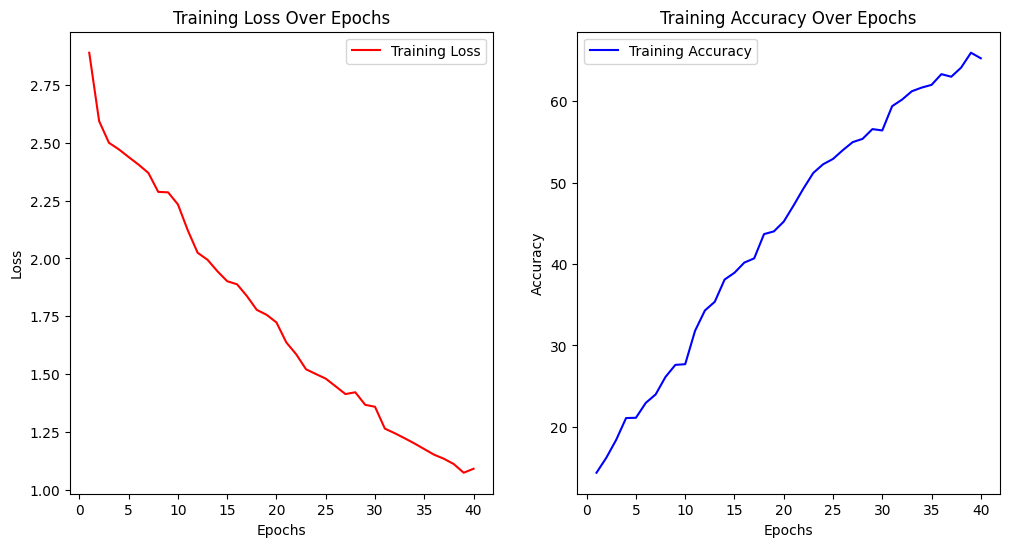

Validation Loss: 1.1519, Accuracy: 64.93%

Neural Network Classifier Performance:
              precision    recall  f1-score   support

   n01768244       0.66      0.81      0.73       100
   n02074367       0.93      0.85      0.89       100
   n02099712       0.59      0.54      0.56       100
   n02123045       0.54      0.69      0.61       100
   n02123394       0.67      0.58      0.62       100
   n02190166       0.68      0.55      0.61       100
   n02206856       0.51      0.50      0.51       100
   n02226429       0.57      0.62      0.59       100
   n02423022       0.70      0.76      0.73       100
   n02791270       0.54      0.57      0.55       100
   n02917067       0.83      0.90      0.87       100
   n03085013       0.66      0.58      0.62       100
   n03126707       0.65      0.74      0.69       100
   n03179701       0.68      0.66      0.67       100
   n03250847       0.56      0.39      0.46       100

    accuracy                           0.65      150

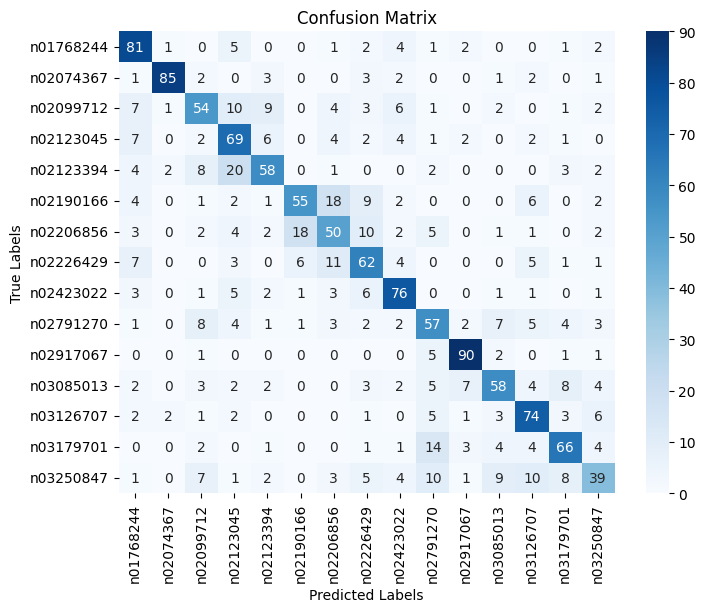

In [7]:
# Parameters
input_size = (128, 128)
batch_size = 32
epochs = 40
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define dataset paths
train_path = "/Users/maheshnilewar/Documents/CV_Assignment/train"
val_path = "/Users/maheshnilewar/Documents/CV_Assignment/test"

# Load datasets first to get class information
train_dataset = datasets.ImageFolder(root=train_path)
num_classes = len(train_dataset.classes)  # Now train_dataset is defined before use

# Data Augmentation and Normalization
train_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

val_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Reapply transforms after getting class info
train_dataset.transform = train_transform
val_dataset = datasets.ImageFolder(root=val_path, transform=val_transform)

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Advanced CNN Model
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes):
        super(AdvancedCNN, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2, 2)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 8 * 8, 1024),  # Adjust size based on feature map
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Initialize Model
model = AdvancedCNN(num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)

# Training Loop
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    scheduler.step()  # Update learning rate
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

# Save Model
torch.save(model.state_dict(), 'cnn_model.pth')

# Plot Training Loss and Accuracy
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Training Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Training Accuracy", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()

plt.show()

# Evaluate Model on Validation Set
model.eval()
correct = 0
total = 0
val_loss = 0.0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = outputs.max(1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

val_accuracy = 100 * correct / total
print(f'Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {val_accuracy:.2f}%')

# Classification Report
print("\nConvutional Neural Network Classifier Performance:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()